# SPRINT 3

## ⚠️ Origem dos Arquivos de Dados

Os arquivos de dados no formato `.csv` utilizados neste projeto foram criados e manipulados durante as etapas de desenvolvimento e resolução dos desafios propostos pelo Challenge. 

Portanto, eles podem representar subconjuntos dos dados originais ou serem versões já processadas e enriquecidas para a análise.

## IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
from matplotlib.ticker import FuncFormatter


## SALVANDO CONSTANTES PARA O AMBIENTE

In [2]:
load_dotenv()
PASTA_GRAFICOS = os.getenv("BI_PATH")
CSV = os.getenv("CSV_PATH")

## CARREGANDO CSV

In [3]:
df_clientes = pd.read_csv(f'{CSV}/cliente.csv', sep=',', encoding='utf-8')
df_vendas = pd.read_csv(f'{CSV}/vendas.csv', sep=',', encoding='utf-8')
df_cluster = pd.read_csv(f'{CSV}/cluster.csv', sep=',', encoding='utf-8')
df_clientes.head(5)

,fk_contact,total_gasto,qtd_compras,tp_pessoa,ultima_compra,grupo,ticket_medio
0,Cliente 5,85.92,2,PF,2021-02-27,Pessoa - Dormindo,42.96
1,Cliente 6,576.64,3,PF,2021-07-02,Pessoa - Dormindo,192.21
2,Cliente 7,750.89,5,PF,2021-09-03,Pessoa - Dormindo,150.18
3,Cliente 10,1052.88,8,PF,2022-02-15,Pessoa - Quase dormindo,131.61
4,Cliente 11,787.83,16,PF,2022-07-14,Pessoa - Quase dormindo,49.24


In [4]:
df_cluster

,cluster,recency,frequency,monetary,Qtd
0,Empresa - Ativo Recente,49.000000,210.846154,83867.200000,13
1,Empresa - Dormindo,532.571429,338.000000,86741.501429,7
2,Empresa - Super Ativo,11.333333,659.666667,155158.380000,6
3,Empresa - VIP Consistente,126.000000,1089.333333,347971.346667,3
4,Pessoa - Dormindo,950.592456,1.469174,238.348405,89664
5,Pessoa - Potencial,142.977191,3.071695,507.256880,149898
6,Pessoa - Quase dormindo,576.767439,1.929193,337.585866,124479
7,Pessoa - Super Vip,159.476562,25.057292,3830.507425,11520


In [5]:
df_vendas.head(5)

,nk_ota_localizer_id,fk_contact,date_purchase,time_purchase,place_origin_departure,place_destination_departure,place_origin_return,place_destination_return,fk_departure_ota_bus_company,fk_return_ota_bus_company,gmv_success,total_tickets_quantity_success,ano
0,aa34ed7fd0a6b405df2df1bf9f8d68e6df9b9a868a6181...,Cliente 5,2021-02-23,20:08:25,Rodoviária 3,Rodoviária 5,0,0,48449a14a4ff7d79bb7a1b6f3d488eba397c36ef25634c...,1,45.31,1,2021
1,948356b25b90c0c87c147cead27483c481edda1dacc4c8...,Cliente 6,2021-02-11,22:25:15,Rodoviária 5,Rodoviária 6,0,0,1dfacb2ea5a03e0a915999e03b5a56196f1b1664d2f768...,1,154.20,1,2021
2,2ee9d0978acb5e113d0b3f846ab3f88c5a426321da8f87...,Cliente 7,2021-02-19,19:11:40,Rodoviária 6,Rodoviária 7,0,0,1d0ebea552eb43d0b1e1561f6de8ae92e3de7f1abec523...,1,188.99,1,2021
3,929cd361c225ec5d3510e14e8582fdcc61a24383cdb7a7...,Cliente 10,2021-07-02,11:41:19,Rodoviária 8,Rodoviária 10,0,0,c6f3ac57944a531490cd39902d0f777715fd005efac9a3...,1,61.55,1,2021
4,f08c3f551a19f1ce13525825dbf0d0ce9c3492da92bbb2...,Cliente 11,2022-07-14,10:16:52,Rodoviária 9,Rodoviária 11,0,0,96061e92f58e4bdcdee73df36183fe3ac64747c81c26f6...,1,55.46,1,2022


## Análise 1: Quantos clientes existem em cada grupo?

In [6]:
df_contagem = df_clientes.groupby('grupo').size().reset_index(name='qtd_pessoas')

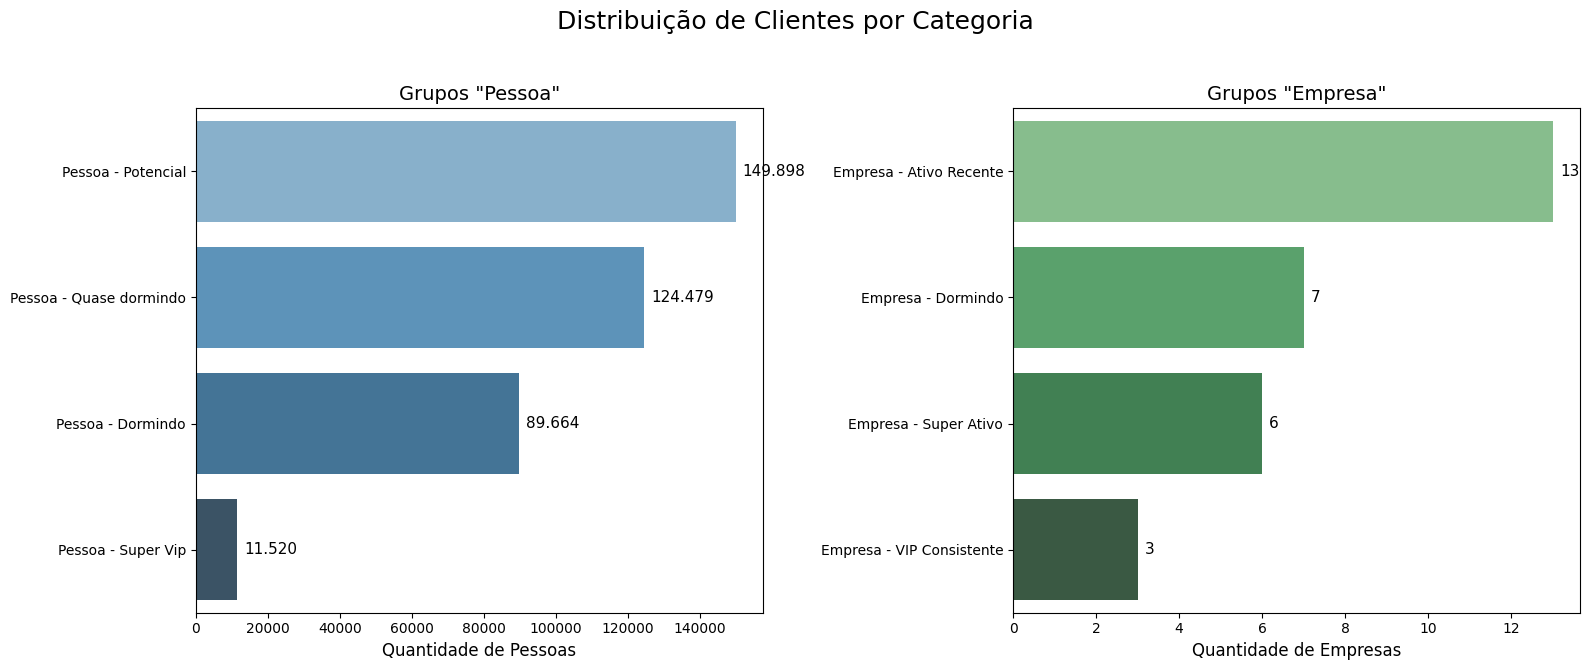

In [7]:
# Criamos uma cópia para não alterar o DataFrame original
df_agregado = df_cluster.copy()

# Renomeamos 'cluster' para 'grupo' e 'Qtd' para 'qtd_pessoas'
df_agregado.rename(columns={'cluster': 'grupo', 'Qtd': 'qtd_pessoas'}, inplace=True)

# Criamos a coluna 'categoria'
df_agregado['categoria'] = df_agregado['grupo'].apply(lambda x: 'Pessoa' if 'Pessoa' in x else 'Empresa')


# 2. Separação em DataFrames 'Pessoa' e 'Empresa'
df_pessoa = df_agregado[df_agregado['categoria'] == 'Pessoa'].sort_values('qtd_pessoas', ascending=False)
df_empresa = df_agregado[df_agregado['categoria'] == 'Empresa'].sort_values('qtd_pessoas', ascending=False)


# 3. Geração dos Gráficos (código inalterado)
# Criamos a figura que conterá os dois gráficos (subplots), com 1 linha e 2 colunas.
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Distribuição de Clientes por Categoria', fontsize=18)

# --- Gráfico da Esquerda (Pessoa) ---
sns.barplot(ax=axes[0], x='qtd_pessoas', y='grupo', data=df_pessoa, palette='Blues_d')
axes[0].set_title('Grupos "Pessoa"', fontsize=14)
axes[0].set_xlabel('Quantidade de Pessoas', fontsize=12)
axes[0].set_ylabel('')

# Criamos uma lista de textos formatados com ponto como separador de milhar.
labels_pessoa = [f'{x:,.0f}'.replace(',', '.') for x in df_pessoa['qtd_pessoas']]
# Usamos o parâmetro 'labels' para passar nossa lista de textos prontos.
axes[0].bar_label(axes[0].containers[0], labels=labels_pessoa, fontsize=11, padding=5)

# --- Gráfico da Direita (Empresa) ---
sns.barplot(ax=axes[1], x='qtd_pessoas', y='grupo', data=df_empresa, palette='Greens_d')
axes[1].set_title('Grupos "Empresa"', fontsize=14)
axes[1].set_xlabel('Quantidade de Empresas', fontsize=12)
axes[1].set_ylabel('')

# Aplicamos a mesma correção para o gráfico de empresas.
axes[1].bar_label(axes[1].containers[0], labels=df_empresa['qtd_pessoas'], fontsize=11, padding=5)

# Ajusta o layout para evitar sobreposição e exibe o gráfico.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

nome_arquivo = 'Distribuição de Clientes por Categoria.png'
caminho_completo = os.path.join(PASTA_GRAFICOS, 'geral/' + nome_arquivo)
plt.savefig(caminho_completo, bbox_inches='tight')

plt.show()
plt.close()

## Análise 2: Quanto que fatura por dia da semana?

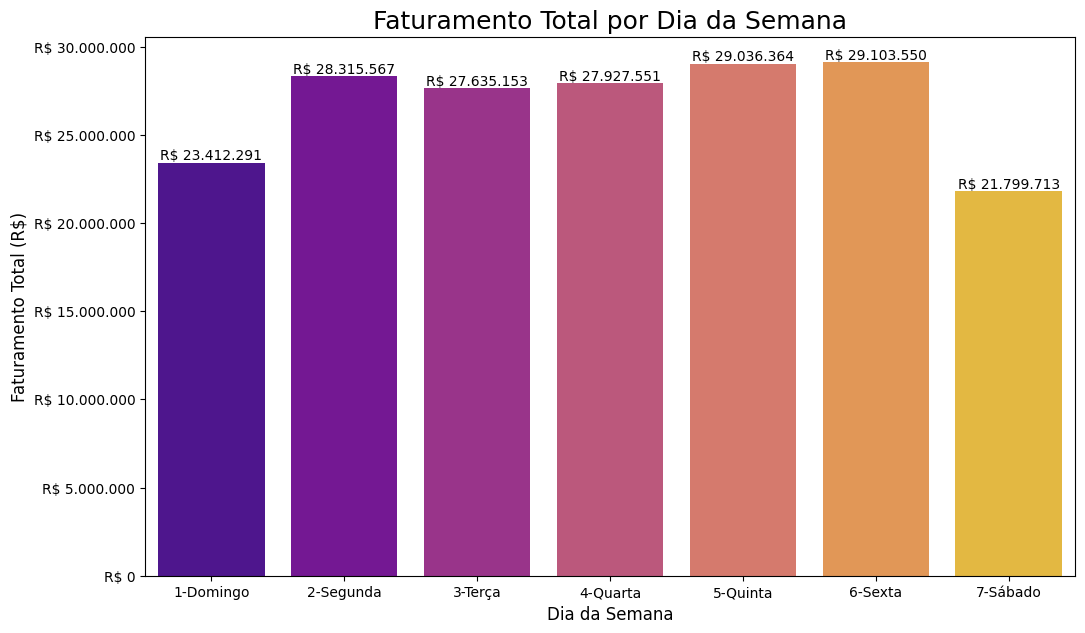

In [8]:
# --- Preparação dos Dados ---
df_vendas['date_purchase'] = pd.to_datetime(df_vendas['date_purchase'])

dias_semana_map = {
    'Monday': '2-Segunda', 'Tuesday': '3-Terça', 'Wednesday': '4-Quarta',
    'Thursday': '5-Quinta', 'Friday': '6-Sexta', 'Saturday': '7-Sábado', 'Sunday': '1-Domingo'
}
df_vendas['dia_da_semana'] = df_vendas['date_purchase'].dt.day_name().map(dias_semana_map)

# --- Agrupamento dos Dados  ---
vendas_por_dia = df_vendas.groupby('dia_da_semana')['gmv_success'].sum().sort_index()

# --- Geração do Gráfico ---
plt.figure(figsize=(12, 7))
plot = sns.barplot(
    x=vendas_por_dia.index,
    y=vendas_por_dia.values,
    palette='plasma'
)

plt.title('Faturamento Total por Dia da Semana', fontsize=18)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'R$ {x:,.0f}'.replace(",", ".")))

# 1. Criamos a lista de textos com a formatação desejada (R$ 1.234.567)
labels_formatados = [f'R$ {val:_.0f}'.replace('_', '.') for val in vendas_por_dia.values]
# 2. Passamos a lista pronta para o parâmetro 'labels'
plot.bar_label(plot.containers[0], labels=labels_formatados, fontsize=10)

nome_arquivo = 'Faturamento_por_Dia_da_Semana.png'
caminho_completo = os.path.join(PASTA_GRAFICOS, 'geral/' + nome_arquivo)
plt.savefig(caminho_completo, bbox_inches='tight')

plt.show()
plt.close()

## Análise 3: Quais são os horários que os clientes mais compram durante a semana?

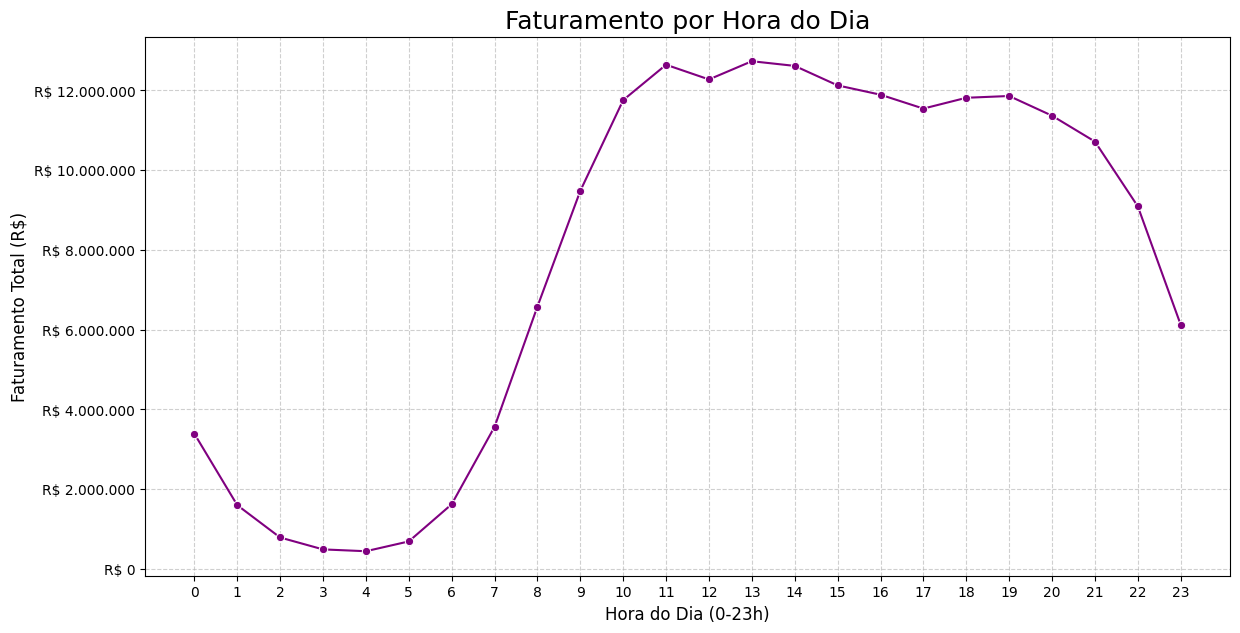

In [9]:
# --- Preparação dos Dados ---
df_vendas['hora_da_compra'] = pd.to_datetime(df_vendas['time_purchase'], format='%H:%M:%S').dt.hour

# --- Agrupamento dos Dados ---
faturamento_por_hora = df_vendas.groupby('hora_da_compra')['gmv_success'].sum()

# --- Geração do Gráfico ---
plt.figure(figsize=(14, 7))
plot = sns.lineplot(
    x=faturamento_por_hora.index,
    y=faturamento_por_hora.values,
    marker='o',
    color='purple'
)
plt.title('Faturamento por Hora do Dia', fontsize=18)
plt.xlabel('Hora do Dia (0-23h)', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.xticks(range(0, 24)) # Garante que todas as horas apareçam no eixo X
plt.grid(True, linestyle='--', alpha=0.6)
# Formata o eixo Y para o padrão monetário
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'R$ {x:,.0f}'.replace(",", ".")))
nome_arquivo = 'Faturamento_por_Hora_do_Dia.png'
caminho_completo = os.path.join(PASTA_GRAFICOS, 'geral/' + nome_arquivo)
plt.savefig(caminho_completo, bbox_inches='tight')
plt.show()
plt.close()

## Análise 2.1: Quais são os horários que os clientes mais compram em um dia específico da semana?

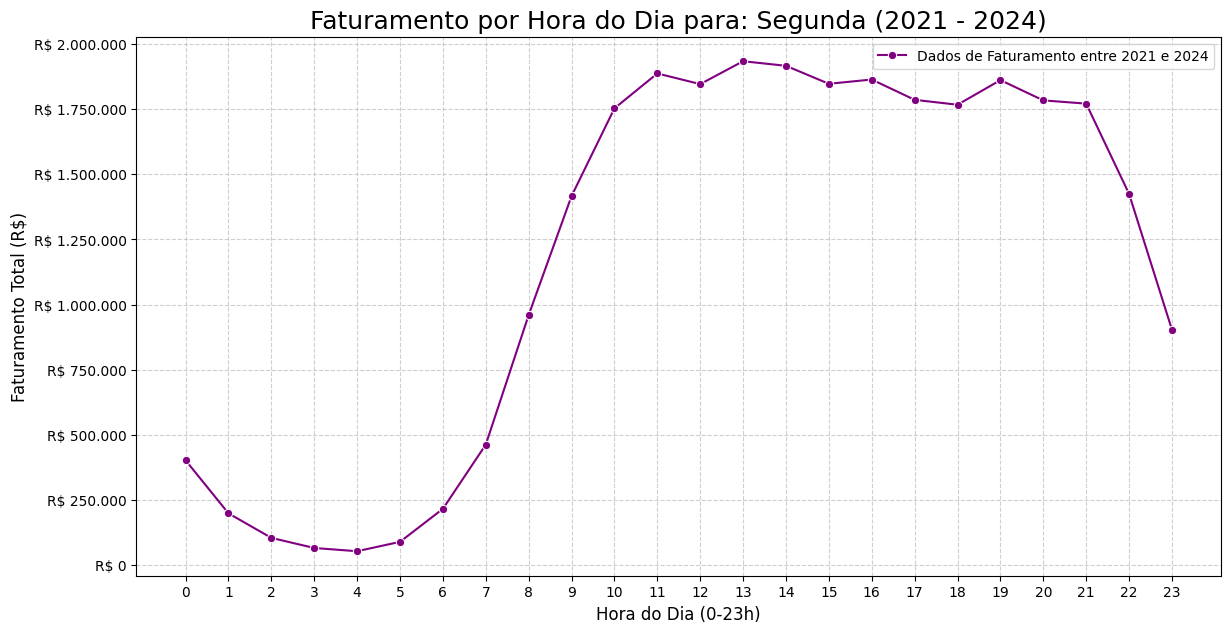

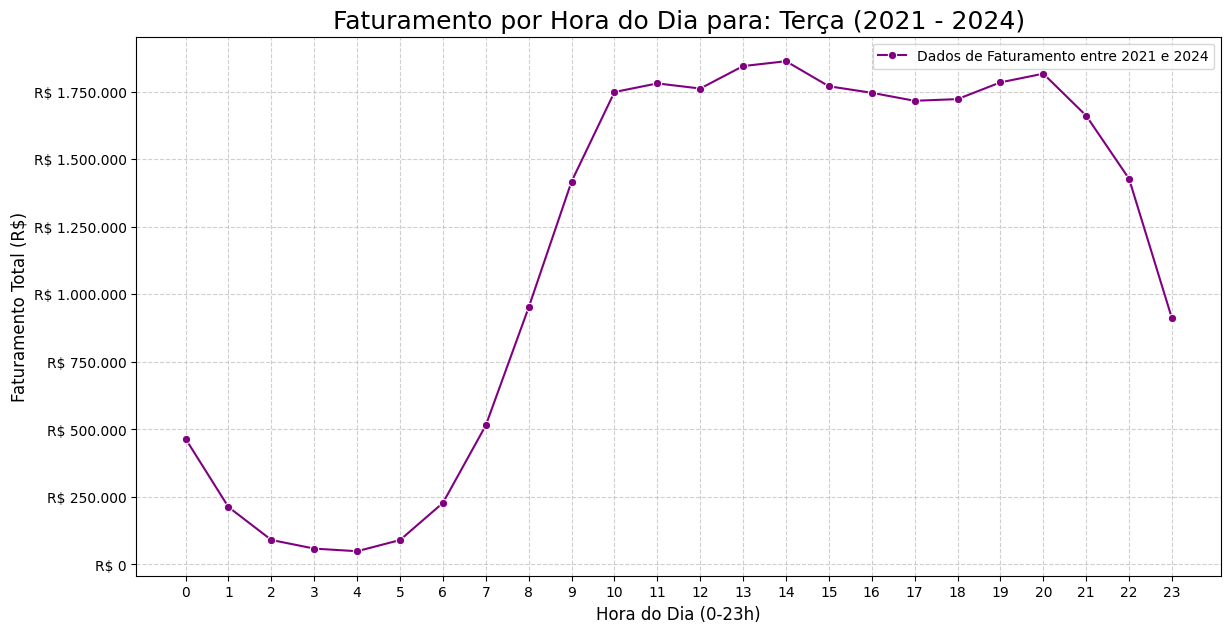

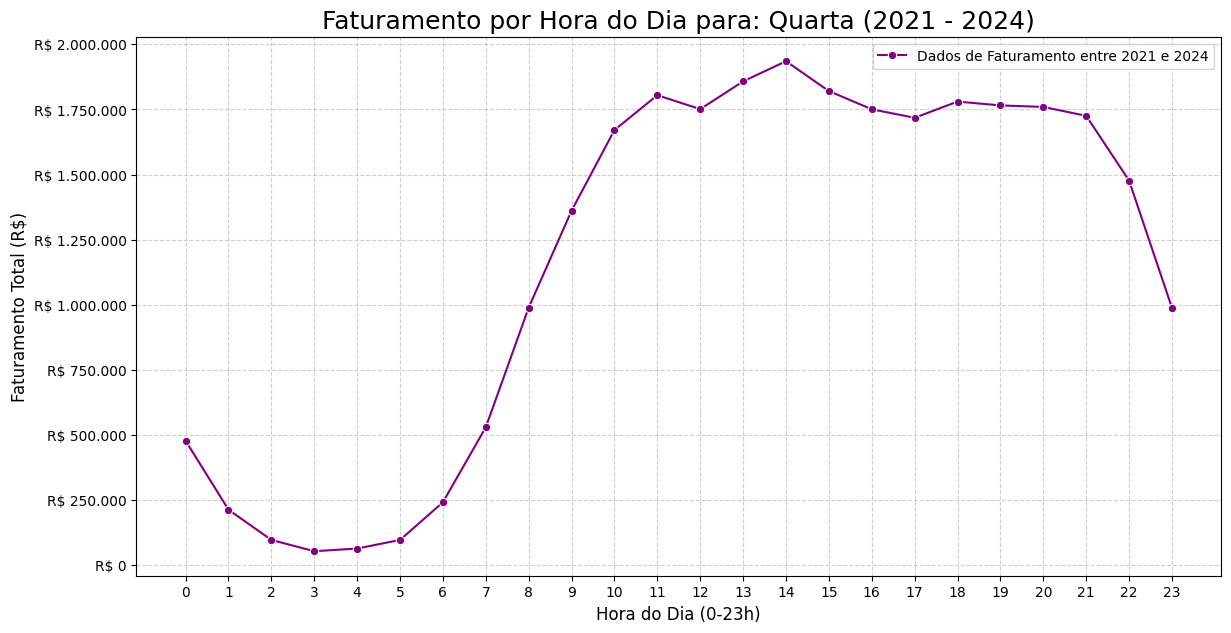

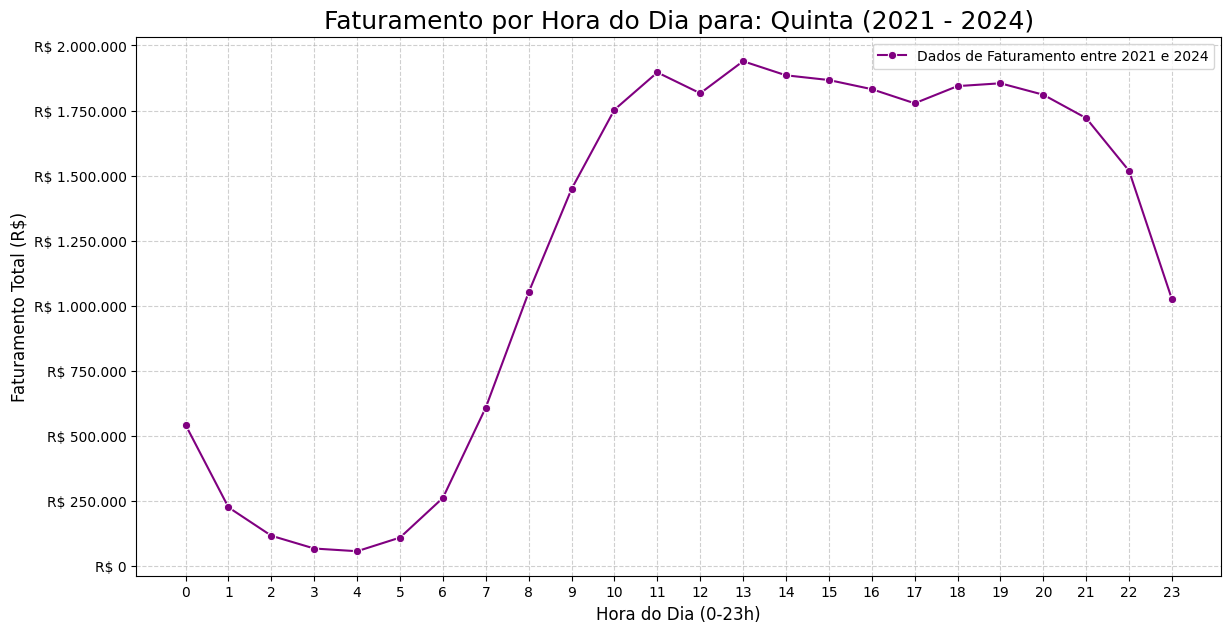

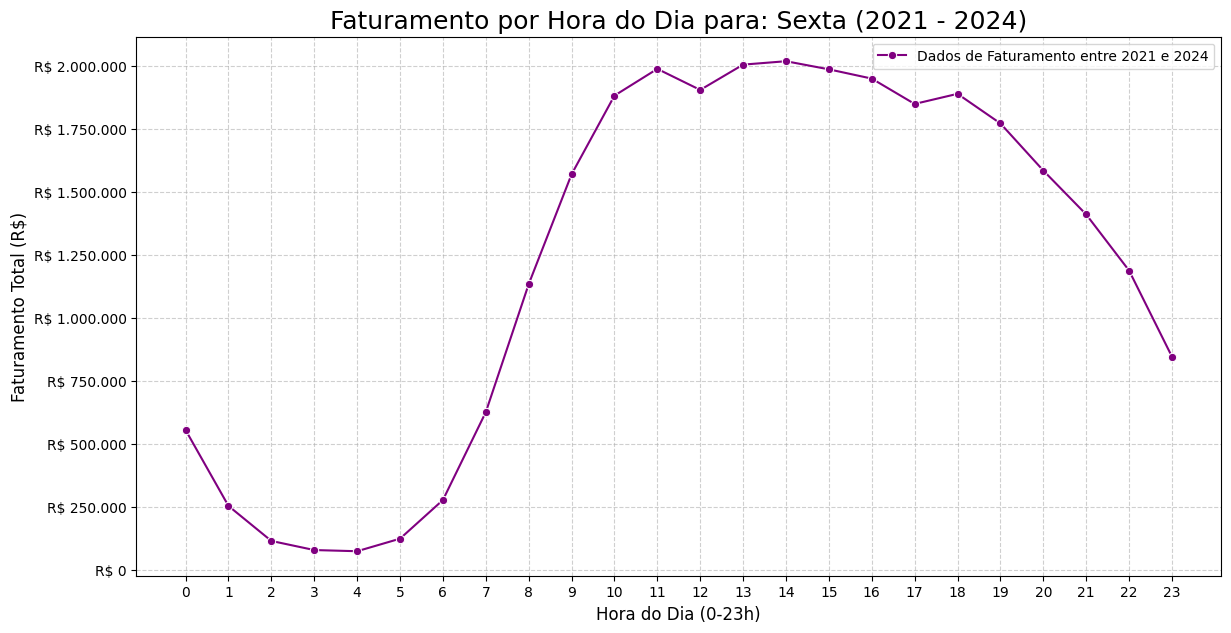

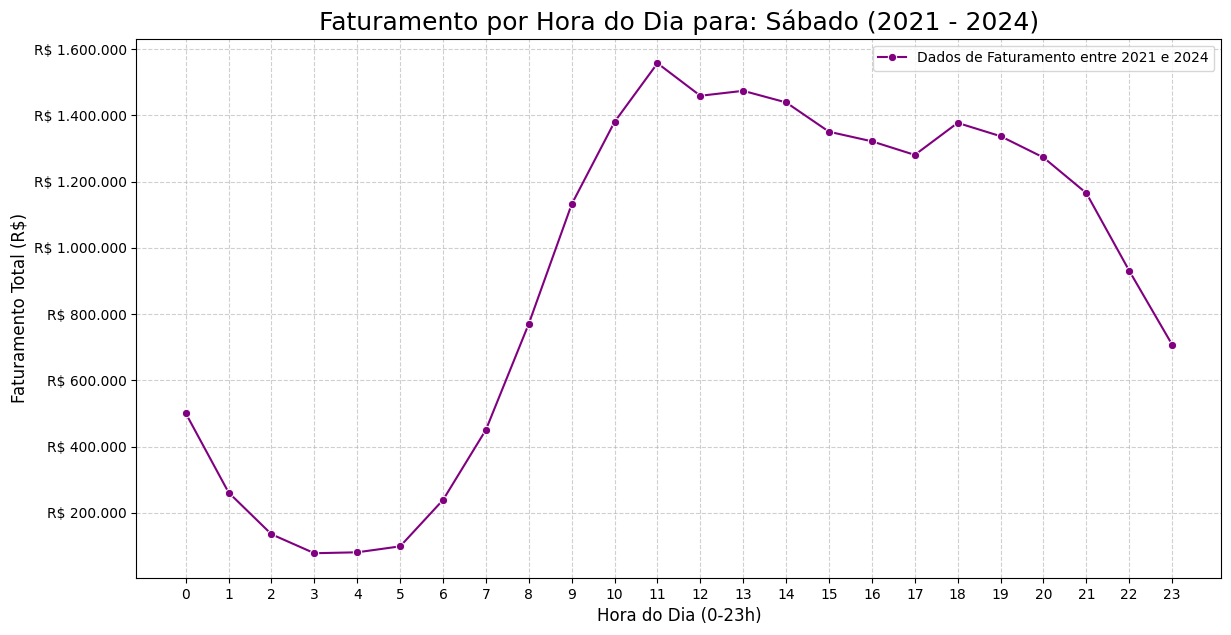

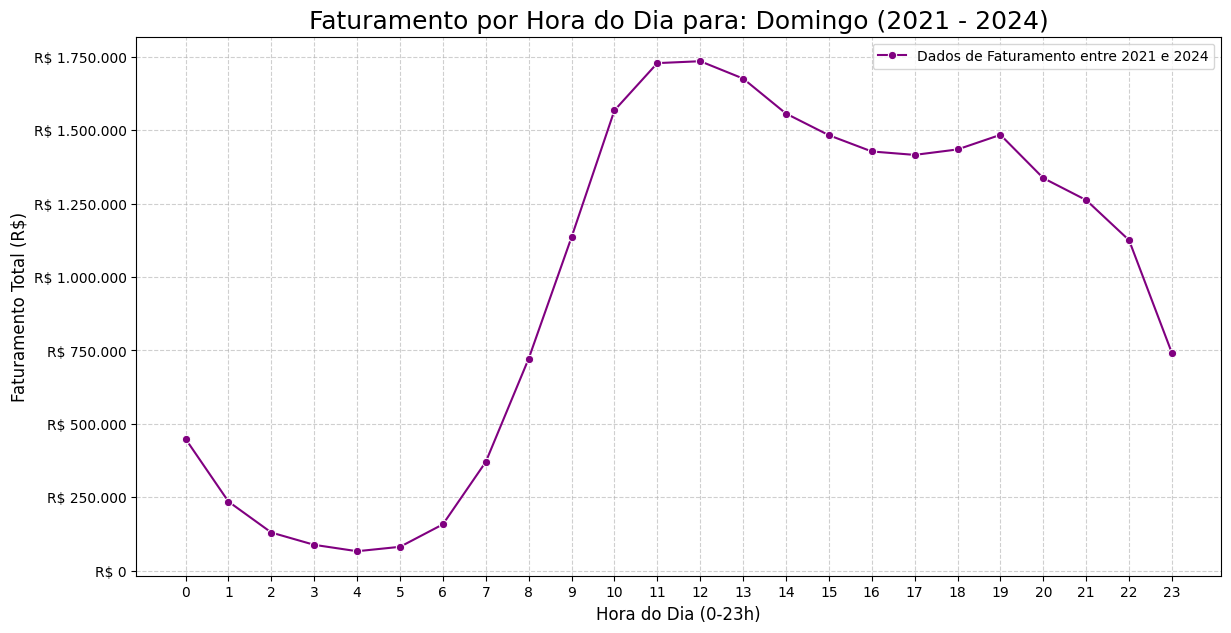

In [10]:
# --- ETAPA DE PREPARAÇÃO (Garantindo que as colunas existem) ---
# Garante que a coluna de data de compra está no formato correto
df_vendas['date_purchase'] = pd.to_datetime(df_vendas['date_purchase'])

# Cria a coluna 'hora_da_compra'
df_vendas['hora_da_compra'] = pd.to_datetime(df_vendas['time_purchase'], format='%H:%M:%S').dt.hour

# Cria a coluna 'dia_da_semana' para o filtro
dias_semana_map = {
    'Monday': '2-Segunda', 'Tuesday': '3-Terça', 'Wednesday': '4-Quarta',
    'Thursday': '5-Quinta', 'Friday': '6-Sexta', 'Saturday': '7-Sábado', 'Sunday': '1-Domingo'
}
df_vendas['dia_da_semana'] = df_vendas['date_purchase'].dt.day_name().map(dias_semana_map)

for dia_semana in dias_semana_map.values():

    df_filtrado = df_vendas[df_vendas['dia_da_semana'] == dia_semana].copy()


    # --- Agrupamento e Geração do Gráfico (com os dados já filtrados) ---
    if not df_filtrado.empty:
        # Agrupamos por hora e somamos o faturamento (gmv_success)
        faturamento_por_hora = df_filtrado.groupby('hora_da_compra')['gmv_success'].sum()

        # --- Geração do Gráfico ---
        plt.figure(figsize=(14, 7))
        plot = sns.lineplot(
            x=faturamento_por_hora.index,
            y=faturamento_por_hora.values,
            marker='o',
            color='purple'
        )
        plt.title(f'Faturamento por Hora do Dia para: {dia_semana.split("-")[1]} (2021 - 2024)', fontsize=18)
        plt.xlabel('Hora do Dia (0-23h)', fontsize=12)
        plt.ylabel('Faturamento Total (R$)', fontsize=12)
        plt.xticks(range(0, 24))
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'R$ {x:,.0f}'.replace(",", ".")))
        plt.legend(['Dados de Faturamento entre 2021 e 2024'])
        nome_arquivo = f'Faturamento_por_Hora_{dia_semana}.png'
        caminho_completo = os.path.join(PASTA_GRAFICOS, 'geral/' + nome_arquivo)
        plt.savefig(caminho_completo, bbox_inches='tight')
        plt.close(fig)
    else:
        print(f"Não foram encontradas vendas para o dia '{dia_semana}'.")